# Guiding questions

Enrollment of international students has soared at Columbia. How does this growth compare to other Ivies and elite institutions?

In [1]:
from collections import defaultdict
from matplotlib import cm
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
df = pd.read_csv('../data/GSS_Elite.csv', header=5, index_col=False, thousands=',')
df.columns = ['Year', 'Institution Name', 'Citizenship', 'Count']

# Drop first row (total) annd last 3 rows (footnotes)
df = df[1:-3]

# We only care about international student counts
df = df[ df['Citizenship'] == 'Foreign nationals' ]
df = df.drop('Citizenship', 1)

# Rename all instances of 'Columbia Univ...' to 'Columbia University...'
df.loc[
    df['Institution Name'] == 'Columbia Univ in the City of New York', 'Institution Name'
] = 'Columbia University in the City of New York'

# Make the year column a numeric type
df['Year'] = pd.to_numeric(df['Year'])

df.head()

,Year,Institution Name,Count
2,2016,Brown University,754.0
4,2016,Columbia University in the City of New York,4082.0
6,2016,Cornell University,2435.0
8,2016,Dartmouth College,343.0
10,2016,Duke University,1084.0


In [3]:
elites = df['Institution Name'].unique()
elites[0], elites[1] = elites[1], elites[0] # Make Columbia top of list
elites[-1], elites[-2] = elites[-2], elites[-1]

years = sorted(df['Year'].unique())

print('Chosen Ivies and selected elite institutions:')
print(', '.join(elites))

Chosen Ivies and selected elite institutions:
Columbia University in the City of New York, Brown University, Cornell University, Dartmouth College, Duke University, Harvard University, Massachusetts Institute of Technology, Princeton University, Stanford University, University of Pennsylvania, University of Chicago, Yale University


In [4]:
d = defaultdict(dict)
for _, row in df.iterrows():
    d[ row['Year'] ][ row['Institution Name'] ] = row['Count']

In [5]:
standout = 'Columbia University in the City of New York'

In [6]:
viridisBig = cm.get_cmap('viridis', 512)
newcmp = ListedColormap(viridisBig(np.linspace(0.2, 1, 256)))

In [7]:
def plotPopulations(export=False):
    plt.figure(figsize=(10, 10))
    for i, school in enumerate(elites[::-1]):
        counts = [d[year].get(school, None) for year in years]
        plt.plot(
            years,
            counts,
            label=school,
            color=(cm.viridis(1) if school == standout else newcmp(i / len(elites))),
            linewidth=int(school == standout) + 1
        )
        if not export:
            plt.text(years[7], counts[7], school)

    plt.xticks(np.arange(min(years), max(years) + 1, 2))
    plt.ylim(bottom=0)

    plt.xlabel('Year of data collection')
    plt.ylabel('Number of international graduate students')
    plt.title('International graduate student populations at Ivies and selected elite institutions')

    if export:
        plt.tight_layout()
        plt.savefig('elites.pdf', bbox_inches='tight', transparent=True)

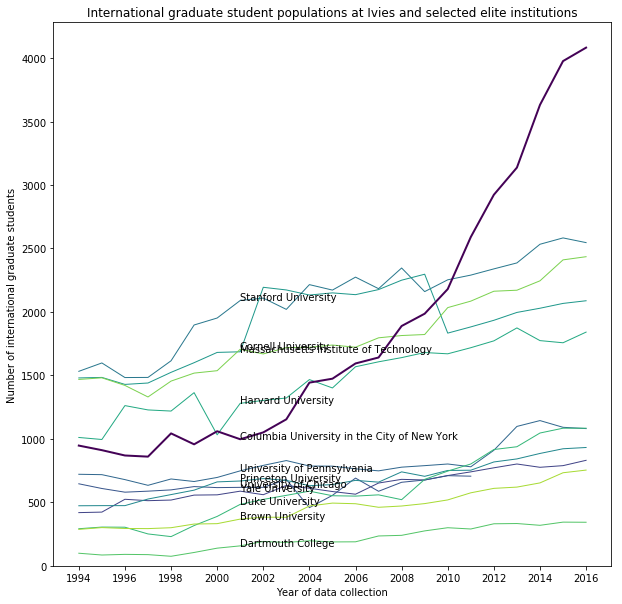

In [11]:
plotPopulations()

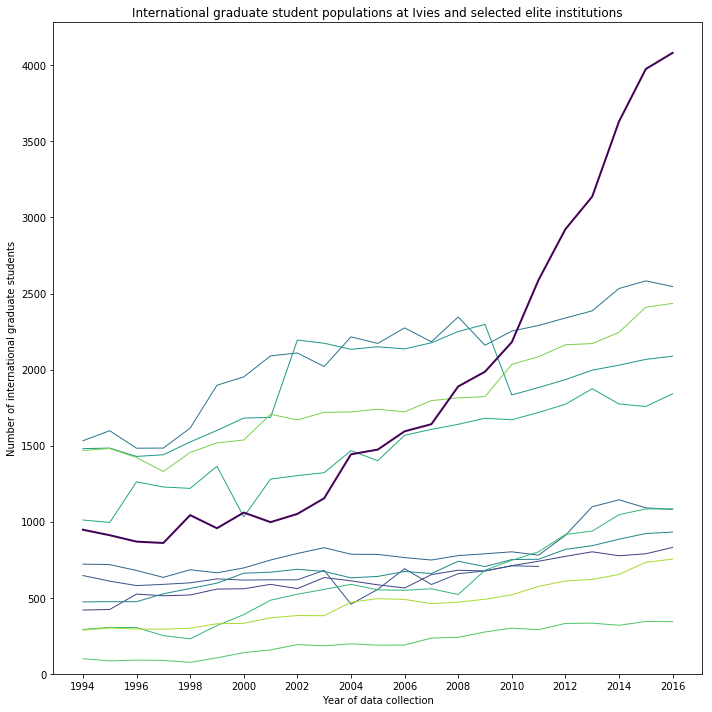

In [8]:
plotPopulations(export=True)

# Findings

International student growth at Columbia is much greater than that at peer institutions.